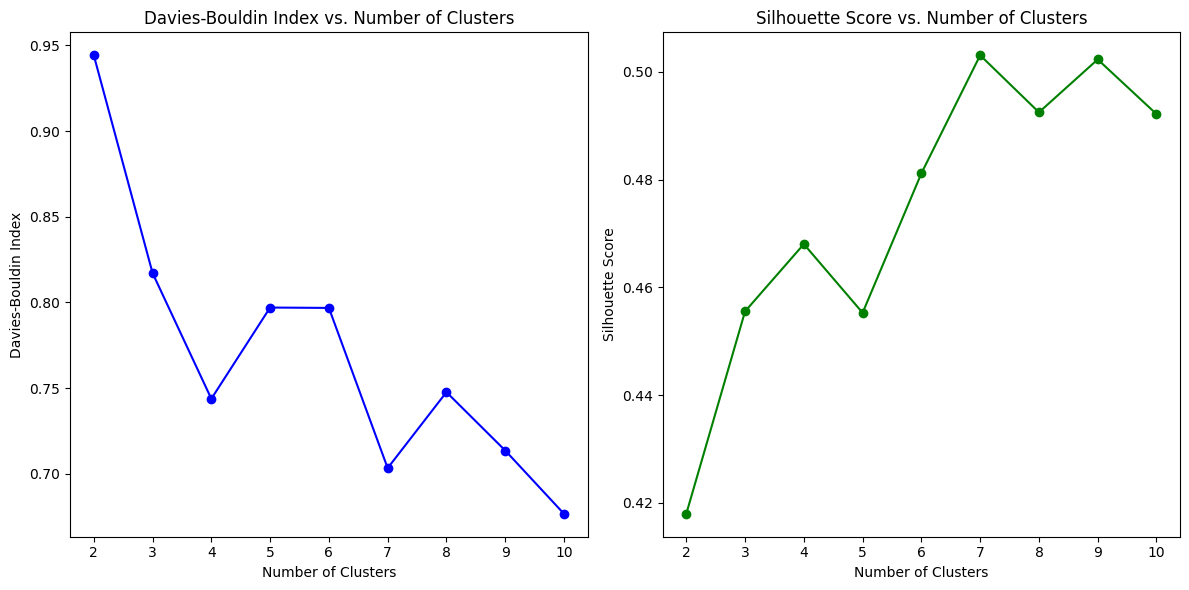

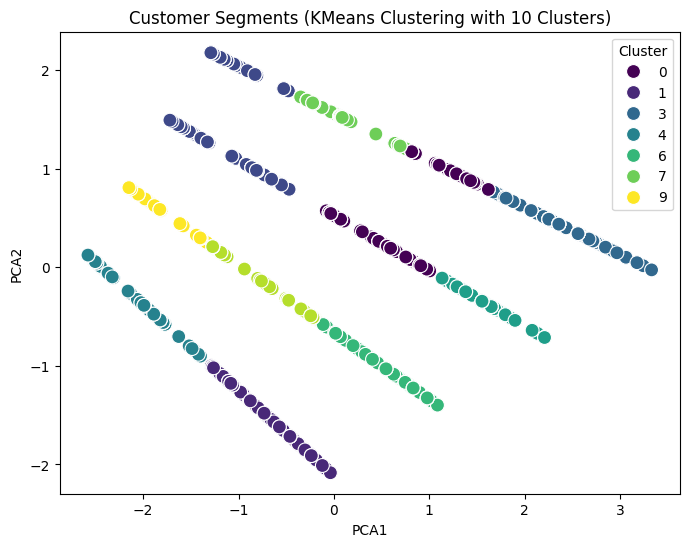

Optimal number of clusters: 10
Davies-Bouldin Index for the optimal clustering: 0.6765661084355534
Silhouette Score for the optimal clustering: 0.49217076401270565


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


customers.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

customers_numeric_cols = customers.select_dtypes(include=['float64', 'int64']).columns
customers[customers_numeric_cols] = customers[customers_numeric_cols].fillna(customers[customers_numeric_cols].median())

customers_categorical_cols = customers.select_dtypes(include=['object']).columns
for col in customers_categorical_cols:
    customers[col] = customers[col].fillna(customers[col].mode()[0])

transactions.fillna(0, inplace=True)

merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')

features = merged_data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

db_index_scores = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    
    db_index = davies_bouldin_score(scaled_features, labels)
    db_index_scores.append(db_index)

    silhouette_avg = silhouette_score(scaled_features, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), db_index_scores, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

best_n_clusters = range(2, 11)[db_index_scores.index(min(db_index_scores))]
best_silhouette_score = silhouette_scores[db_index_scores.index(min(db_index_scores))]

kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

merged_data['Cluster'] = labels

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, s=100)
plt.title(f'Customer Segments (KMeans Clustering with {best_n_clusters} Clusters)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

print(f"Optimal number of clusters: {best_n_clusters}")
print(f"Davies-Bouldin Index for the optimal clustering: {min(db_index_scores)}")
print(f"Silhouette Score for the optimal clustering: {best_silhouette_score}")
